In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [28]:
names = ["dati_1.txt", "dati_2.txt", "dati_3.txt"]
colors = ["tab:green", "tab:orange", "tab:blue"]

f = 2
colors =  (0.3*f, 0.2*f, 0.2*f), (0,0,0), (0.3*f, 0.2*f, 0.5*f)


datas = []

for name in names:
    file = open(name, "r")
    data_i = []
    for row in file:
        row = row.split("\t")
        dat = list(map(float, row))
        data_i.append(dat)
    
    data_i = np.array(data_i)
    data_i = sorted(data_i,  key=lambda k: k[0])

    datas.append(np.array(data_i))

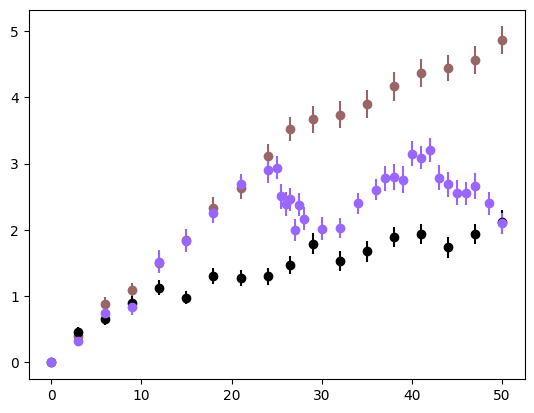

In [29]:
for i, data_i in enumerate(datas):
    plt.errorbar(data_i[:,0], data_i[:,1], data_i[:,4], marker="o", ls="", c=colors[i])

plt.show()

rate gamma =  0.10738158184536824  +-  0.01265865525565338
rate R =  0.10738158184536824  +-  9.857364737164731
c =  0.004840455144261892  +-  0.0027214328835651006
rate gamma =  0.08524354190290184  +-  0.0066592395361213755
rate R =  0.08524354190290184  +-  22.66125696282039
c =  0.0014953200767534548  +-  0.0007112311252803591
R =  0.06384249328465412  +-  0.002509850414889877
c =  -0.03306419285312143  +-  0.07728575589369689


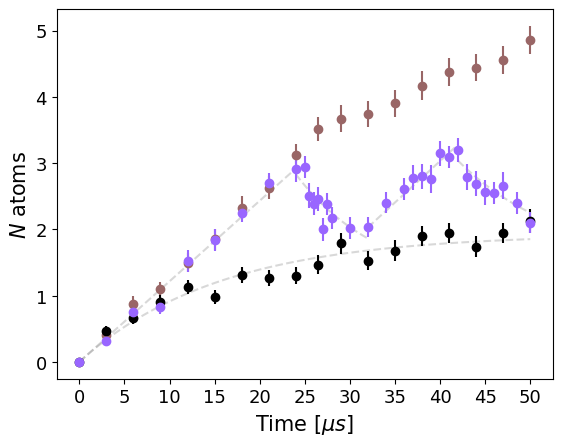

In [32]:
########## rette

min_maxs = [(0, 9), (17, 26)]
R=0

for min_, max_ in min_maxs:
    data_i = datas[2]
    data_i = np.array(data_i)
    x = data_i[min_:max_,0]
    y = data_i[min_:max_,1]
    dy = data_i[min_:max_,4]

    dy[0] = 0.01

    def line_(x_, m):
        return m*(x_ - x[0]) + y[0]

    res, cov = curve_fit(line_, x, y, sigma=dy, p0=[1])
    #print("rate = ", res[0], " +- ", np.sqrt(cov[0,0]))
    xs = np.linspace(min(x), max(x), 100)
    ys = line_(xs, *res)

    plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

    R += res
R = R/2

########## esponenziali

min_maxs = [(8, 18), (25, 33)]

for min_, max_ in min_maxs:
    data_i = datas[2]
    data_i = np.array(data_i)
    x = data_i[min_:max_,0]
    y = data_i[min_:max_,1]
    dy = data_i[min_:max_,4]

    if max_ == 33:
        x = np.array(list(x)+[50])
        y = np.array(list(y)+[y[-2]])
        dy = np.array(list(dy)+[dy[-2]])


    def exp_func(x_, gamma, c):
        return R/gamma + c*np.e**(-gamma*(x_))
        #return a*np.e**(b*(x_-x[0])) + c

    res, cov = curve_fit(exp_func, x, y, sigma=dy, p0=[0.1,0])
    print("rate gamma = ", res[0], " +- ", np.sqrt(cov[0,0]))
    print("rate R = ", res[0], " +- ", np.sqrt(cov[1,1]))
    print("c = ", res[0]/res[1], " +- ", (np.sqrt(cov[1,1])/res[1]+np.sqrt(cov[0,0])/res[0])*res[0]/res[1])
    xs = np.linspace(min(x), max(x), 100)
    ys = exp_func(xs, *res)

    plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

############ stato stazionario

data_i = datas[1]
data_i = np.array(data_i)
x = data_i[:,0]
y = data_i[:,1]
dy = data_i[:,4]

dy[0]=0.01

def exp_func(x_, gamma, c):
    return R/gamma + c*np.e**(-gamma*(x_))

res, cov = curve_fit(exp_func, x, y, sigma=dy, p0=[1,0])
print("R = ", res[0], " +- ", np.sqrt(cov[0,0]))
print("c = ", res[0]/res[1], " +- ", np.sqrt(cov[1,1]))
xs = np.linspace(min(x), max(x), 100)
ys = exp_func(xs, *res)

plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

############ punti sperimentali

for i, data_i in enumerate(datas):
    data_i = np.array(data_i)
    x = data_i[:,0]
    y = data_i[:,1]
    dy = data_i[:,4]
    plt.errorbar(x, y, dy, marker="o", ls="", c=colors[i])

plt.xlabel(r"Time [$\mu s$]", fontsize=15)
plt.ylabel(r"$N$ atoms", fontsize=15)

plt.xticks(np.arange(0,54, 5), fontsize=13)
plt.yticks(fontsize=13)

#plt.savefig('repump_twice_1.png', dpi=300)

plt.show()

In [ ]:
(0.125+0.121)/2

0.123

In [ ]:
(0.37+0.24)/2

0.305

In [ ]:
names = ["dati_1_.txt", "dati_2_.txt"]
f = 2
colors = (0,0,0), (0.3*f, 0.2*f, 0.5*f)

datas = []

for name in names:
    file = open(name, "r")
    data_i = []
    for row in file:
        row = row.split("\t")
        dat = list(map(float, row))
        data_i.append(dat)

    data_i = np.array(data_i)
    data_i = sorted(data_i,  key=lambda k: k[0])

    datas.append(data_i)

c =  2.1338980432830352  +-  4.4413185658825265
rate =  0.8093129744792025  +-  0.17173218721238007
c =  2.183397251084584  +-  2490905.018806108
rate =  0.9997773976890706  +-  0.21908764155300506
rate =  2.456669922334111  +-  0.1436402693051973
rate =  2.299151009285043  +-  0.14108784896617127
rate =  2.4838933477509046  +-  0.391807305240592
c =  1.9020877800114613  +-  0.057359937811092804


/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_7274/4026950711.py:61: RuntimeWarning: overflow encountered in power
  return R/gamma + c*np.e**(-gamma*(x_))


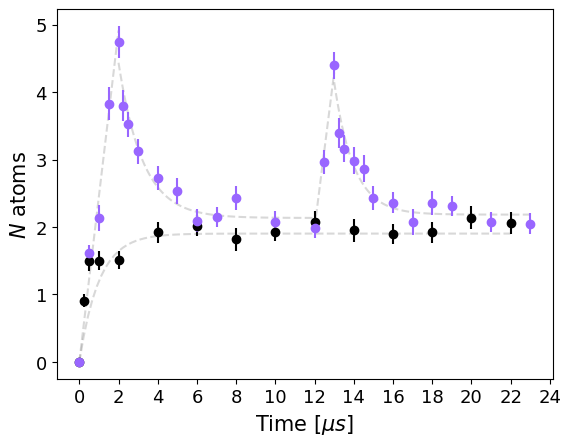

In [ ]:

### esponenziali

min_maxs = [(4, 15), (16, 28)]

for min_, max_ in min_maxs:
    data_i = datas[1]
    data_i = np.array(data_i)
    x = data_i[min_:max_,0]
    y = data_i[min_:max_,1]
    dy = data_i[min_:max_,4]

    #def exp_func(x_, a, b, c):
    #    return a*np.e**(b*(x_-x[0])) + c
    
    def exp_func(x_, R, gamma, c):
        return R/gamma + c*np.e**(-gamma*(x_))
        #return a*np.e**(b*(x_-x[0])) + c

    res, cov = curve_fit(exp_func, x, y, sigma=dy, p0=[1,0.1,0])
    print("c = ", res[0]/res[1], " +- ", np.sqrt(cov[2,2]))
    print("rate = ", res[1], " +- ", np.sqrt(cov[1,1]))
    xs = np.linspace(min(x), max(x), 100)
    ys = exp_func(xs, *res)

    plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

### rette

min_maxs = [(0, 5), (14, 17)]

for min_, max_ in min_maxs:
    data_i = datas[1]
    data_i = np.array(data_i)
    x = data_i[min_:max_,0]
    y = data_i[min_:max_,1]
    dy = data_i[min_:max_,4]

    dy[0] = 0.01

    def line_(x_, m):
        return m*(x_ - x[0]) + y[0]

    res, cov = curve_fit(line_, x, y, sigma=dy, p0=[1])
    print("rate = ", res[0], " +- ", np.sqrt(cov[0,0]))
    xs = np.linspace(min(x), max(x), 100)
    ys = line_(xs, *res)

    plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

############ stato stazionario

data_i = datas[0]
data_i = np.array(data_i)
x = data_i[:,0]
y = data_i[:,1]
dy = data_i[:,4]

dy[0]=0.01

def exp_func(x_, R, gamma, c):
        return R/gamma + c*np.e**(-gamma*(x_))
        #return a*np.e**(b*(x_-x[0])) + c

res, cov = curve_fit(exp_func, x, y, sigma=dy, p0=[1,1,0])
print("rate = ", res[1], " +- ", np.sqrt(cov[1,1]))
print("c = ", res[0]/res[1], " +- ", np.sqrt(cov[2,2]))
xs = np.linspace(min(x), max(x), 100)
scale = 0.4
ys = exp_func(xs, res[0]*scale, res[1]*scale, res[2])

plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

############ punti sperimentali

for i, data_i in enumerate(datas):
    data_i = np.array(data_i)
    x = data_i[:,0]
    y = data_i[:,1]
    dy = data_i[:,4]
    plt.errorbar(x, y, dy, marker="o", ls="", c=colors[i])

plt.xlabel(r"Time [$\mu s$]", fontsize=15)
plt.ylabel(r"$N$ atoms", fontsize=15)

plt.xticks(np.arange(0,25, 2), fontsize=13)
plt.yticks(fontsize=13)

#plt.savefig('repump_twice_2.png', dpi=300)

plt.show()

In [ ]:
(2.4566699+2.29915)/2

2.3779099500000003

In [ ]:
(0.809 + 0.999777)/2

0.9043885

In [ ]:
2.4/0.8

2.9999999999999996

rate =  -0.37138637286774245  +-  0.179166552223193
rate =  -0.2400744041704875  +-  0.16716814796270937
rate =  0.12159474044316484  +-  0.003547014498165972
rate =  0.12510276004853227  +-  0.005246109458832384
rate =  0.056551944500798264  +-  0.008154942667050406
rate =  -0.8092955501032534  +-  0.17172140609511394
rate =  -0.9997819395510495  +-  0.21909035742395674
rate =  2.456669922334111  +-  0.1436402693051973
rate =  2.299151009285043  +-  0.14108784896617127
rate =  2.4838933477509046  +-  0.391807305240592


/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_7274/4026678862.py:88: RuntimeWarning: overflow encountered in power
  return R/gamma + c*np.e**(-gamma*(x_))
/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_7274/4026678862.py:193: RuntimeWarning: overflow encountered in power
  return R/gamma + c*np.e**(-gamma*(x_))


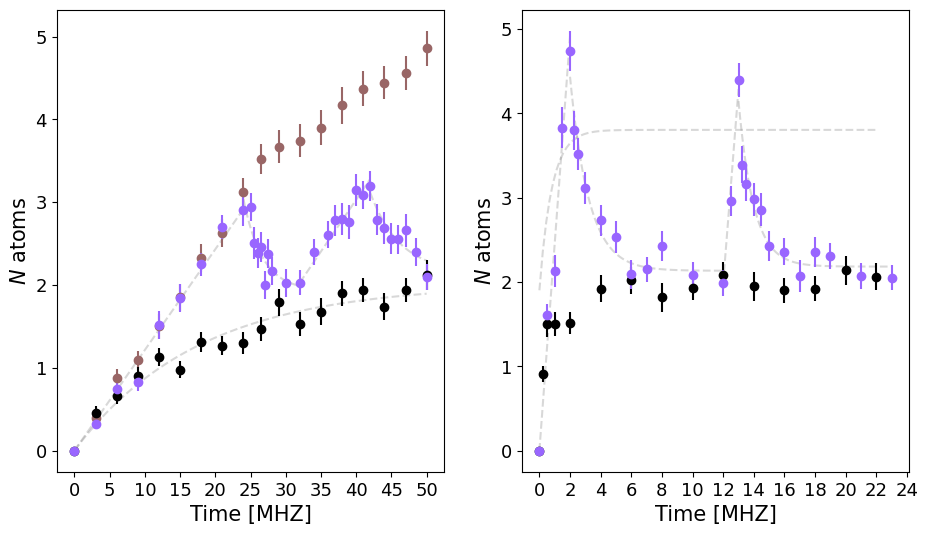

In [ ]:
plt.figure(figsize=(11,6))

plt.subplot(1,2,1)

names = ["dati_1.txt", "dati_2.txt", "dati_3.txt"]
colors = ["tab:green", "tab:orange", "tab:blue"]

f = 2
colors =  (0.3*f, 0.2*f, 0.2*f), (0,0,0), (0.3*f, 0.2*f, 0.5*f)


datas = []

for name in names:
    file = open(name, "r")
    data_i = []
    for row in file:
        row = row.split("\t")
        dat = list(map(float, row))
        data_i.append(dat)
    
    data_i = np.array(data_i)
    data_i = sorted(data_i,  key=lambda k: k[0])

    datas.append(np.array(data_i))

########## esponenziali

min_maxs = [(8, 18), (25, 33)]

for min_, max_ in min_maxs:
    data_i = datas[2]
    data_i = np.array(data_i)
    x = data_i[min_:max_,0]
    y = data_i[min_:max_,1]
    dy = data_i[min_:max_,4]

    if max_ == 33:
        x = np.array(list(x)+[50])
        y = np.array(list(y)+[y[-2]])
        dy = np.array(list(dy)+[dy[-2]])


    def exp_func(x_, a, b, c):
        return a*np.e**(b*(x_-x[0])) + c

    res, cov = curve_fit(exp_func, x, y, sigma=dy, p0=[1,0.1,0])
    print("rate = ", res[1], " +- ", np.sqrt(cov[1,1]))
    xs = np.linspace(min(x), max(x), 100)
    ys = exp_func(xs, *res)

    plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

########## rette

min_maxs = [(0, 9), (17, 26)]

for min_, max_ in min_maxs:
    data_i = datas[2]
    data_i = np.array(data_i)
    x = data_i[min_:max_,0]
    y = data_i[min_:max_,1]
    dy = data_i[min_:max_,4]

    dy[0] = 0.01

    def line_(x_, m):
        return m*(x_ - x[0]) + y[0]

    res, cov = curve_fit(line_, x, y, sigma=dy, p0=[1])
    print("rate = ", res[0], " +- ", np.sqrt(cov[0,0]))
    xs = np.linspace(min(x), max(x), 100)
    ys = line_(xs, *res)

    plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

############ stato stazionario

data_i = datas[1]
data_i = np.array(data_i)
x = data_i[:,0]
y = data_i[:,1]
dy = data_i[:,4]

dy[0]=0.01

def exp_func(x_, R, gamma, c):
        return R/gamma + c*np.e**(-gamma*(x_))
        #return a*np.e**(b*(x_-x[0])) + c

res, cov = curve_fit(exp_func, x, y, sigma=dy, p0=[1,1,0])
print("rate = ", res[1], " +- ", np.sqrt(cov[1,1]))
xs = np.linspace(min(x), max(x), 100)
ys = exp_func(xs, *res)

plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

############ punti sperimentali

for i, data_i in enumerate(datas):
    data_i = np.array(data_i)
    x = data_i[:,0]
    y = data_i[:,1]
    dy = data_i[:,4]
    plt.errorbar(x, y, dy, marker="o", ls="", c=colors[i])

plt.xlabel("Time [MHZ]", fontsize=15)
plt.ylabel(r"$N$ atoms", fontsize=15)

plt.xticks(np.arange(0,54, 5), fontsize=13)
plt.yticks(fontsize=13)

#plt.savefig('repump_twice_1.png', dpi=300)

#plt.show()

plt.subplot(1,2,2)

names = ["dati_1_.txt", "dati_2_.txt"]
f = 2
colors = (0,0,0), (0.3*f, 0.2*f, 0.5*f)

datas = []

for name in names:
    file = open(name, "r")
    data_i = []
    for row in file:
        row = row.split("\t")
        dat = list(map(float, row))
        data_i.append(dat)

    data_i = np.array(data_i)
    data_i = sorted(data_i,  key=lambda k: k[0])

    datas.append(data_i)

### esponenziali

min_maxs = [(4, 15), (16, 28)]

for min_, max_ in min_maxs:
    data_i = datas[1]
    data_i = np.array(data_i)
    x = data_i[min_:max_,0]
    y = data_i[min_:max_,1]
    dy = data_i[min_:max_,4]

    def exp_func(x_, a, b, c):
        return a*np.e**(b*(x_-x[0])) + c

    res, cov = curve_fit(exp_func, x, y, sigma=dy, p0=[1,0.1,0])
    print("rate = ", res[1], " +- ", np.sqrt(cov[1,1]))
    xs = np.linspace(min(x), max(x), 100)
    ys = exp_func(xs, *res)

    plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

### rette

min_maxs = [(0, 5), (14, 17)]

for min_, max_ in min_maxs:
    data_i = datas[1]
    data_i = np.array(data_i)
    x = data_i[min_:max_,0]
    y = data_i[min_:max_,1]
    dy = data_i[min_:max_,4]

    dy[0] = 0.01

    def line_(x_, m):
        return m*(x_ - x[0]) + y[0]

    res, cov = curve_fit(line_, x, y, sigma=dy, p0=[1])
    print("rate = ", res[0], " +- ", np.sqrt(cov[0,0]))
    xs = np.linspace(min(x), max(x), 100)
    ys = line_(xs, *res)

    plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

############ stato stazionario

data_i = datas[0]
data_i = np.array(data_i)
x = data_i[:,0]
y = data_i[:,1]
dy = data_i[:,4]

dy[0]=0.01

def exp_func(x_, R, gamma, c):
        return R/gamma + c*np.e**(-gamma*(x_))
        #return a*np.e**(b*(x_-x[0])) + c

res, cov = curve_fit(exp_func, x, y, sigma=dy, p0=[1,1,0])
print("rate = ", res[1], " +- ", np.sqrt(cov[1,1]))
xs = np.linspace(min(x), max(x), 100)
ys = exp_func(xs, res[0], res[1]*0.5, res[2])

plt.plot(xs, ys, color="grey", alpha=0.3, ls="--")

############ punti sperimentali

for i, data_i in enumerate(datas):
    data_i = np.array(data_i)
    x = data_i[:,0]
    y = data_i[:,1]
    dy = data_i[:,4]
    plt.errorbar(x, y, dy, marker="o", ls="", c=colors[i])

plt.xlabel("Time [MHZ]", fontsize=15)
plt.ylabel(r"$N$ atoms", fontsize=15)

plt.xticks(np.arange(0,25, 2), fontsize=13)
plt.yticks(fontsize=13)

plt.savefig('repump_twice_togheter.png', dpi=300)

plt.show()